# **Projet IAD - SMA (RANDOM FORESTS )**

## **Random foresets:**

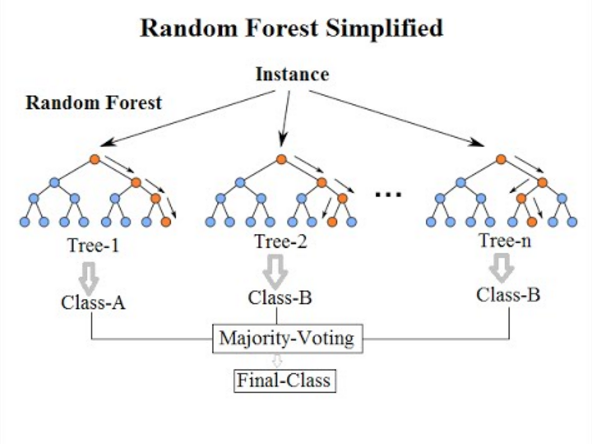

* L’algorithme des « forêts aléatoires » (ou Random Forest parfois aussi traduit par forêt d’arbres décisionnels) est un algorithme de classification qui réduit la variance des prévisions d’un arbre de décision seul, améliorant ainsi leurs performances. Pour cela, il combine de nombreux arbres de décisions dans une approche de type bagging.

* L’algorithme des « forêts aléatoires » a été proposé par Leo Breiman et Adèle Cutler en 2001. Dans sa formule la plus classique, il effectue un apprentissage en parallèle sur de multiples arbres de décision construits aléatoirement et entraînés sur des sous-ensembles de données différents. Le nombre idéal d’arbres, qui peut aller jusqu’à plusieurs centaines voire plus, est un paramètre important : il est très variable et dépend du problème. Concrètement, chaque arbre de la forêt aléatoire est entrainé sur un sous ensemble aléatoire de données selon le principe du bagging, avec un sous ensemble aléatoire de features (caractéristiques variables des données) selon le principe des « projections aléatoires ». Les prédictions sont ensuite moyennées lorsque les données sont quantitatives ou utilisés pour un vote pour des données qualitatives, dans le cas des arbres de classification. L’algorithme des forêts aléatoires est connu pour être un des classifieurs les plus efficaces « out-of-the-box » (c’est-à-dire nécessitant peu de prétraitement des données). Il a été utilisé dans de nombreuses applications, y compris grand public, comme pour la classification d’images de la caméra de console de jeu Kinect* dans le but d’identifier des positions du corps.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## **EDA :**

In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_test.shape

(418, 11)

In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Comment :
* We can see that *'Cabin'* has the most missing values in both the train and test data sets.
* *'Embraked'* has only two missing values in the training data set.
* *'Age'* We have almost 20% as a missing value  in both the train and test data sets.

**Variables exploration :**

* *'PassengerId'* is just a sequential ID for the passangers , so we won't need it in our analysis and also ML.
* *'Survived'* is our target. it's a Binary value  ( 0 => Died | 1 => Survived )

**Visualizing our target variable values ( Survived )**

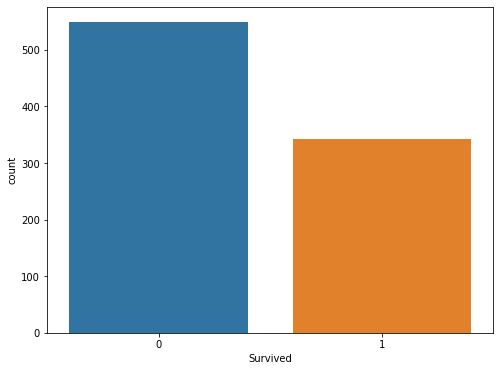

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Survived',data=df_train)

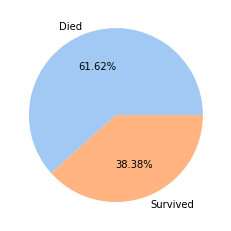

In [ ]:
disaster_tweets = df_train.groupby(['Survived']).count()['PassengerId'][0]
non_disaster_tweets = df_train.groupby(['Survived']).count()['PassengerId'][1]

data = [disaster_tweets, non_disaster_tweets]
colors = sns.color_palette('pastel')
labels = ['Died', 'Survived']
plt.pie(data, colors = colors,labels=labels,autopct = '%.2f%%')
plt.show()

In [ ]:
print('percentage of passengers who survived by cabin class:')
(
    df_train[['Pclass', 'Survived']]
    .groupby(['Pclass'])
    .agg('mean').round(2)
)

percentage of passengers who survived by cabin class:


,Survived
Pclass,
1,0.63
2,0.47
3,0.24


In [ ]:
print('percentage of passengers who survived by sex:')
(
    df_train[['Sex', 'Survived']]
    .groupby(['Sex'])
    .agg('mean').round(2)
)

percentage of passengers who survived by sex:


,Survived
Sex,
female,0.74
male,0.19


**Interpolate for missing values**

Age : 

In [ ]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## **Feature selection :**

*Optimizing our features*

Simple observation :
* For the columns 'Name' and 'Ticket' , they doesn't make any sense in our case to classify rather the person survived or not , we can just dropped them to semplify our Machine Learning training after.
* About the column 'Cabin' we already noticed on our EDA that there's a lot of missing values that we can't deal with it in our case, we can drop it too.

In [ ]:
cols_to_drop = ['Name', 'Ticket', 'Cabin']
df_train = df_train.drop(cols_to_drop, axis=1)

## **Data Cleaning**

Dealing with our NaN values ( missing values ) to simplify learning for our model .

*Column ' Age ' :*

In [ ]:
df_train['Age'] = df_train['Age'].interpolate()

In [ ]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,22.5,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


As we've already notice on our EDA, we don't have a lot of NaN Values except for the column : 'Age'.
So what we can do, is to just drop the other NaN values for the rest of our Data set.  ( Just 2 rows where a column has a missing value ! )

In [ ]:
df_train.dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,22.5,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [ ]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,22.5,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


## **Convert categorical values to numeric**

### Dummy Encoding 

As we've already noticed in our EDA ( df_train.info() ) , we do have some variables that aren't numeric.
That's why, in this section, we'll try to Encode our categorical values to numerical values.

Columns considered : 'Embarked' - 'Sex' 

- To simplify this process , we gonna use a technique named ***dummy columns***

In [ ]:
Dummy_col_Embarked = pd.get_dummies(df_train['Embarked'])
Dummy_col_Sex = pd.get_dummies(df_train['Sex'])

In [ ]:
# we concatinate our dummy columns, with our current data set
df_train = pd.concat((df_train, Dummy_col_Embarked, Dummy_col_Sex), axis=1)

In [ ]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female,male
0,1,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,0,0,1,0,1
887,888,1,1,female,19.0,0,0,30.0000,S,0,0,1,1,0
888,889,0,3,female,22.5,1,2,23.4500,S,0,0,1,1,0
889,890,1,1,male,26.0,0,0,30.0000,C,1,0,0,0,1


Now that we add our dummy columns, we can drop our old columns ( 'Sex' and 'Embarked' 

In [ ]:
df_train = df_train.drop(['Sex','Embarked'],axis=1)

In [ ]:
df_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,0,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1,1,0
888,889,0,3,22.5,1,2,23.4500,0,0,1,1,0
889,890,1,1,26.0,0,0,30.0000,1,0,0,0,1


**A simple hitmap to see the correlation between our final features :**

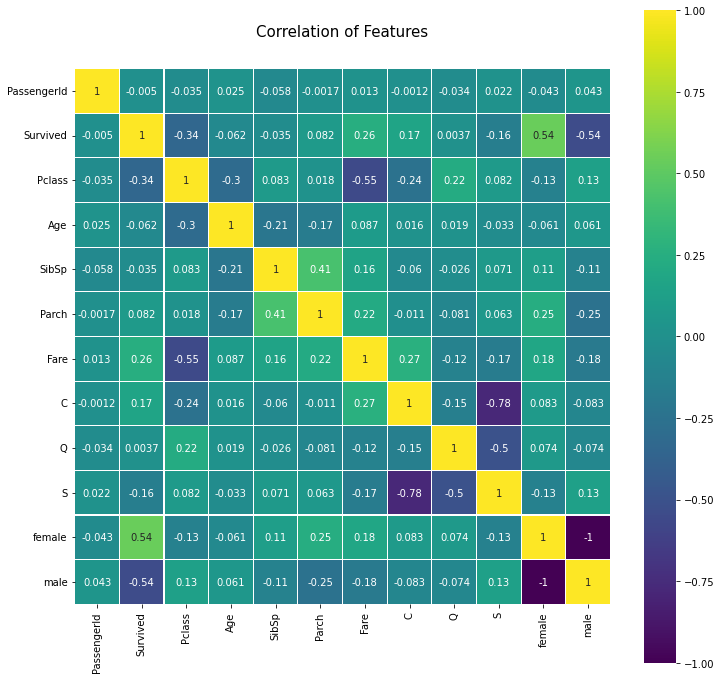

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(df_train.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## Last Data set Check 

We've almost finished our process before starting our ML Training 

*Let's verify if we still have any null values...*

In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   C            891 non-null    uint8  
 8   Q            891 non-null    uint8  
 9   S            891 non-null    uint8  
 10  female       891 non-null    uint8  
 11  male         891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 53.2 KB


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.726061,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783,0.352413,0.647587
std,257.353842,0.486592,0.836071,13.902353,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876,0.477990,0.477990
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_train.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1
5,6,0,3,44.5,0,0,8.4583,0,1,0,0,1
6,7,0,1,54.0,0,0,51.8625,0,0,1,0,1
7,8,0,3,2.0,3,1,21.0750,0,0,1,0,1
8,9,1,3,27.0,0,2,11.1333,0,0,1,1,0
9,10,1,2,14.0,1,0,30.0708,1,0,0,1,0


In [ ]:
df_train.tail(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
881,882,0,3,33.0,0,0,7.8958,0,0,1,0,1
882,883,0,3,22.0,0,0,10.5167,0,0,1,1,0
883,884,0,2,28.0,0,0,10.5000,0,0,1,0,1
884,885,0,3,25.0,0,0,7.0500,0,0,1,0,1
885,886,0,3,39.0,0,5,29.1250,0,1,0,1,0
886,887,0,2,27.0,0,0,13.0000,0,0,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1,1,0
888,889,0,3,22.5,1,2,23.4500,0,0,1,1,0
889,890,1,1,26.0,0,0,30.0000,1,0,0,0,1
890,891,0,3,32.0,0,0,7.7500,0,1,0,0,1


## **Split the Dataset into Training and Test Datasets**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_train.values
y = df_train['Survived'].values

# Delete the Survived column from X
X = np.delete(X,1,axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=0)

## **Creating & Testing our Decision Tree Model :** 

In [ ]:
from sklearn import tree
from sklearn.metrics import confusion_matrix

In [ ]:
# Using simple Decision Tree classifier
Dtree_model = tree.DecisionTreeClassifier(max_depth=4)
Dtree_model.fit(X_train, y_train)
Dtree_model.score(X_test, y_test)

0.8203389830508474

Great ! we have 82.03% accuracy 😀

In [ ]:
y_pred = Dtree_model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[173,  11],
       [ 42,  69]])

**Our confusion matrix result :**

- True positives: 173 (upper left)

- True negatives: 69 (lower right)

- False positives: 11 (upper right)

- False negatives: 42 (lower left)

## **Creating & Testing our Random forest Model :** 

In [ ]:
from sklearn import ensemble

In [ ]:
Rforest_model = ensemble.RandomForestClassifier(n_estimators=60)
Rforest_model.fit(X_train, y_train)
Rforest_model.score(X_test, y_test)

0.8305084745762712

Nice 😃 We have now a 83.05% accuracy !

In [ ]:
y_pred = Rforest_model.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[160,  24],
       [ 26,  85]])

**Our confusion matrix result :**

- True positives: 160 (upper left)

- True negatives: 85 (lower right)

- False positives: 24 (upper right)

- False negatives: 26 (lower left)